In [27]:
!pip install --upgrade --force-reinstall pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [37]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.2 MB/s eta 0:00:00


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import prophet
from prophet import Prophet
from arch import arch_model

In [6]:
#Read the data
df = pd.read_csv('TCS_data.csv')
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,1948.98193359375,1963.6377849619953,1936.753504255791,1949.341502890694,1354908
3,2020-01-02,1940.0355224609375,1960.0864523324526,1932.4378091253816,1960.0864523324526,2380752
4,2020-01-03,1978.69873046875,1998.794662043861,1945.7452310674382,1945.7452310674382,4655761


## Data cleaning

In [7]:
#Let's drop NA
data = df.dropna()
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2,2020-01-01,1948.98193359375,1963.6377849619953,1936.753504255791,1949.341502890694,1354908
3,2020-01-02,1940.0355224609375,1960.0864523324526,1932.4378091253816,1960.0864523324526,2380752
4,2020-01-03,1978.69873046875,1998.794662043861,1945.7452310674382,1945.7452310674382,4655761
5,2020-01-06,1978.5184326171875,2001.4465705668235,1967.2341482718575,1982.6095756449847,3023209


In [8]:
#rename columns
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
data = data.drop([0, 0]).reset_index(drop=True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2020-01-01,1948.98193359375,1963.6377849619953,1936.753504255791,1949.341502890694,1354908
1,2020-01-02,1940.0355224609375,1960.0864523324526,1932.4378091253816,1960.0864523324526,2380752
2,2020-01-03,1978.69873046875,1998.794662043861,1945.7452310674382,1945.7452310674382,4655761
3,2020-01-06,1978.5184326171875,2001.4465705668235,1967.2341482718575,1982.6095756449847,3023209
4,2020-01-07,1983.3741455078125,1991.2864261842058,1963.5480037408104,1978.5636439335565,2429317


In [9]:
#Cleaning data
data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime
data = data.dropna(subset=['Date'])
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(inplace=True)
data.set_index('Date', inplace=True)
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2020-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1237 non-null   float64
 1   High    1237 non-null   float64
 2   Low     1237 non-null   float64
 3   Open    1237 non-null   float64
 4   Volume  1237 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.0 KB
None
                  Close         High          Low         Open   Volume
Date                                                                   
2020-01-01  1948.981934  1963.637785  1936.753504  1949.341503  1354908
2020-01-02  1940.035522  1960.086452  1932.437809  1960.086452  2380752
2020-01-03  1978.698730  1998.794662  1945.745231  1945.745231  4655761
2020-01-06  1978.518433  2001.446571  1967.234148  1982.609576  3023209
2020-01-07  1983.374146  1991.286426  1963.548004  1978.563644  2429317


## Stationarity check

In [10]:
#differencing the data for ADF test
close_diff = data['Close'].diff().dropna()

In [11]:
#Let's check the stationarity of the data
adf_result = adfuller(close_diff)

print("ADF Statistic (Differenced):", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value}")

if adf_result[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still non-stationary.")

ADF Statistic (Differenced): -34.7177979988875
p-value: 0.0
Critical Values:
  1%: -3.4356560275160835
  5%: -2.8638831211270817
  10%: -2.568017509711682
The differenced series is stationary.


## Decomposition

In [12]:
#decomposing
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)

<Figure size 1200x800 with 0 Axes>

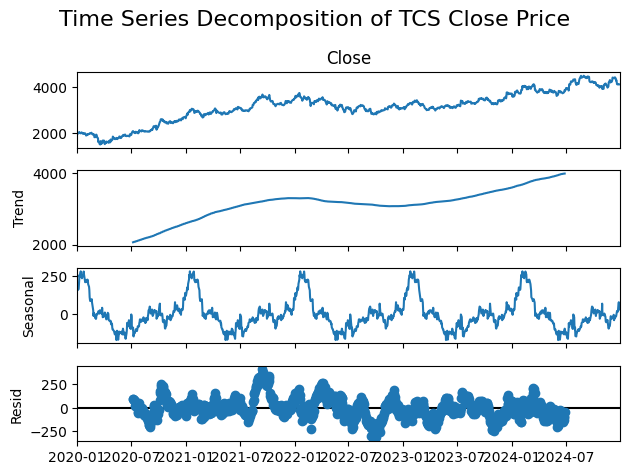

In [13]:
#Plot figure
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Time Series Decomposition of TCS Close Price", fontsize=16)
plt.tight_layout()
plt.show()

## Prediction

In [15]:
#making data prophet suitable
prophet_df = data[['Close']].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

In [21]:
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df[:train_size]
test_df = prophet_df[train_size:]

In [22]:
#make fit prophet
m = Prophet(daily_seasonality=True)
m.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2p4wu4tf/lthqu7z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2p4wu4tf/j1oybm2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64519', 'data', 'file=/tmp/tmp2p4wu4tf/lthqu7z9.json', 'init=/tmp/tmp2p4wu4tf/j1oybm2a.json', 'output', 'file=/tmp/tmp2p4wu4tf/prophet_modelipxx9far/prophet_model-20250511010827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
#future prediction
future = m.make_future_dataframe(periods=2)
forecast = m.predict(future)

In [24]:
print("Prophet Forecast for next 2 trading days:")
print(forecast[['ds', 'yhat']].tail(2))

Prophet Forecast for next 2 trading days:
             ds         yhat
1237 2024-12-31  4445.622882
1238 2025-01-01  4461.386676


## Prophet forecast accuracy

In [25]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [28]:
forecast_tail = forecast[['ds', 'yhat']].tail(2)
actual = test_df['y'].values[-2:]
predicted = forecast_tail['yhat'].values

In [32]:
mape = mean_absolute_percentage_error(actual, predicted) * 100
rmse = np.sqrt(mean_squared_error(actual, predicted))
print('mape: ', mape)
print('rmse: ', rmse)

mape:  8.714464653545006
rmse:  357.14708986417173


In [33]:
actual_diff = np.diff(test_df['y'].values)
pred_diff = np.diff(forecast_tail['yhat'].values)
hit = int(np.sign(actual_diff[0]) == np.sign(pred_diff[0]))

In [58]:
print("Prophet Forecast Evaluation (Next 2 Trading Days)")
print(f"Actual Values : {actual}")
print(f"Predicted Values : {predicted}")
print(f"MAPE : {mape:.2f}%")
print(f"RMSE : {rmse:.2f}")
print(f"Hit Rate (Direction Match): {'Yes' if hit else 'No'}")

Prophet Forecast Evaluation (Next 2 Trading Days)
Actual Values : [4099.50048828 4093.54516602]
Predicted Values : [4445.62288174 4461.38667583]
MAPE : 8.71%
RMSE : 357.15
Hit Rate (Direction Match): No


## Volatility and Trend Analysis

In [42]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data.dropna(subset=['Close'], inplace=True)
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

In [43]:
data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=20).std()

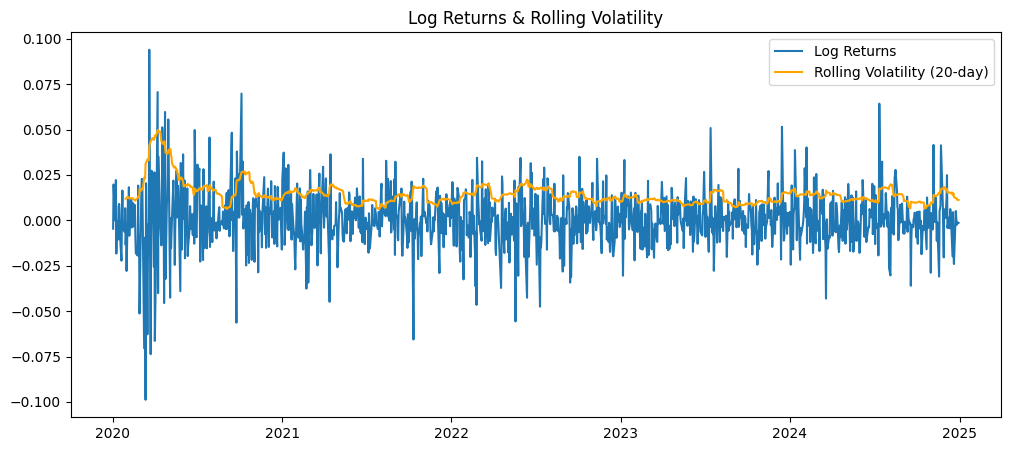

In [44]:
#plot graph of log returns and rolling volatality
plt.figure(figsize=(12, 5))
plt.plot(data['Log_Returns'], label='Log Returns')
plt.plot(data['Rolling_Volatility'], label='Rolling Volatility (20-day)', color='orange')
plt.title("Log Returns & Rolling Volatility")
plt.legend()
plt.show()

In [54]:
#Garch model
garch_model = arch_model(data['Log_Returns']*100, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

In [53]:
#volatality
garch_forecast = garch_result.forecast(horizon=2)
print("GARCH Forecasted Volatility (Next 2 Days):")
print(garch_forecast.variance[-1:])

GARCH Forecasted Volatility (Next 2 Days):
                 h.1       h.2
Date                          
2024-12-30  1.615368  1.654721


In [50]:
#decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

In [57]:
#trend strength
trend_strength = 1 - (np.std(resid.dropna()) / np.std(trend.dropna()))
print(f"Trend Strength Index: {trend_strength:.2f} (Closer to 1 = stronger trend)")

Trend Strength Index: 0.73 (Closer to 1 = stronger trend)
